# 분해 (Decomposition)
* 큰 하나의 행렬을 여러개의 작은 행렬로 분해
* 분해 과정에서 중요한 정보만 남게됨
* 중요한 정보만 남게 된다는 특성을 응용, 활용하는 방법


## 데이터 불러오기 및 시각화

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, MiniBatchSparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
iris, labels = load_iris(return_X_y=True)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
def plot_iris(iris, labels):
  plt.figure()
  colors=['navy','purple','red']
  for xy, label in zip(iris, labels):
    plt.scatter(xy[0], xy[1], color=colors[label])

In [4]:
def show_faces(faces):
  plt.figure()
  num_rows, num_cols = 2,3
  for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(np.reshape(faces[i], (64,64)), cmap=plt.cm.gray)

In [5]:
iris.shape

(150, 4)

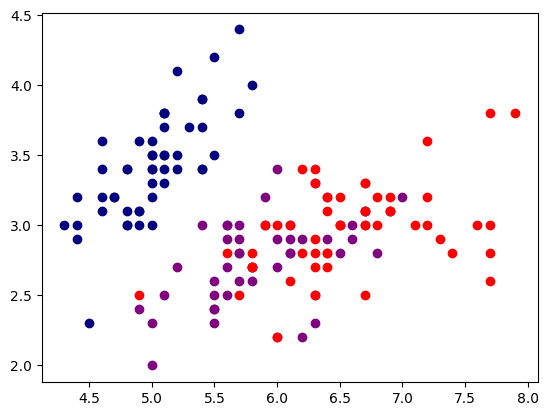

In [6]:
plot_iris(iris[:, :2], labels)

In [7]:
faces.shape

(400, 4096)

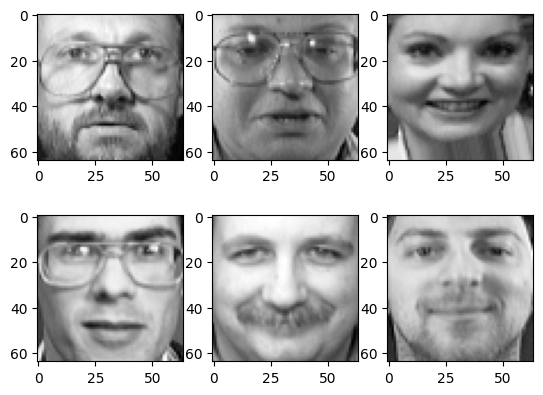

In [8]:
show_faces(faces)

## Principal Component Analysis (PCA)

* PCA(주성분), 분산을 최대로하는 선을 찾고 그 선과 보조선을 기준으로 주성분을 찾아 저차원으로 변환한다. PCA활용 iris 데이터 변환
* $150 \times 4$ 크기(4차원)의 데이터를 $150 \times 2$ 크기(2차원)의 행렬로 압축

In [9]:
model = PCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

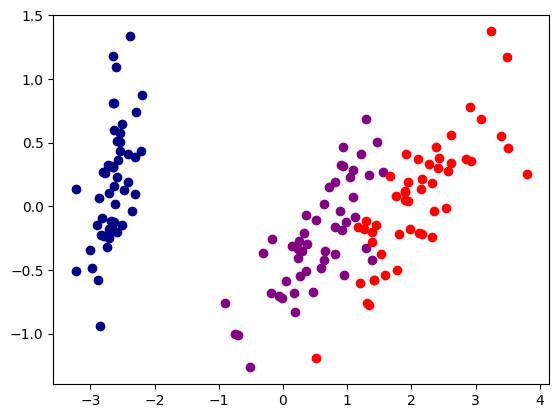

In [10]:
plot_iris(transformed_iris, labels)

* PCA를 통해 학습된 각 컴포넌트 (6개)
* 각 컴포넌트는 얼굴의 주요 특징을 나타냄

In [11]:
model = PCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
faces_components.shape

# 기존 400의 차원을 6으로 줄였다.

(6, 4096)

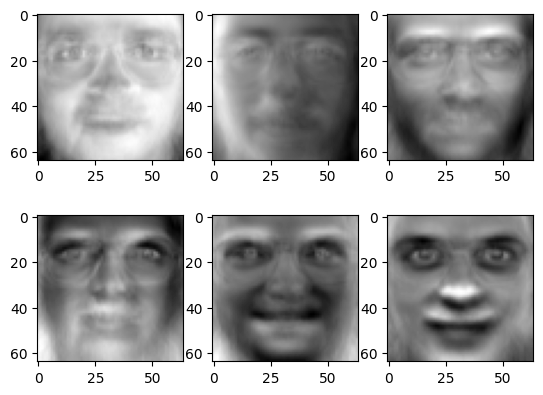

In [12]:
show_faces(faces_components)
# 이미지가 많이 뭉게졌지만, 사람의 어떤 주요 특징을 살린 결과이다.

## Incremental PCA

* PCA는 SVD 알고리즘 실행을 위해 전체 학습용 데이터 셋을 메모리에 올려야 함
* Incremental PCA는 학습 데이터를 미니 배치 단위로 나누어 사용
* 학습 데이터가 크거나 온라인으로 PCA 적용이 필요할 때 유용

In [13]:
model = IncrementalPCA(n_components=2)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

In [14]:
model = IncrementalPCA(n_components=2*3)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

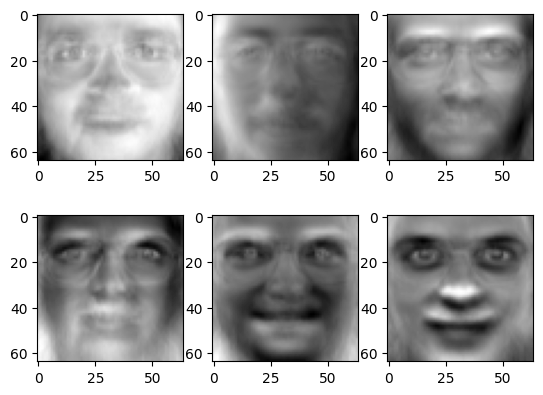

In [15]:
show_faces(faces_components)

## Kernel PCA
* 커널은 비선형적인 특성을 커널형태로 주어질 수 있다.
* 차원 축소를 위한 복잡한 비선형 커널기법을 PCA에 투형

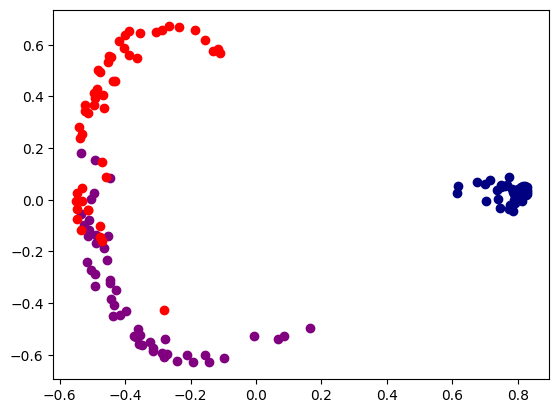

In [16]:
model = KernelPCA(n_components=2, kernel='rbf', random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

In [17]:
model = KernelPCA(n_components=2*3, kernel='rbf', random_state=0)
model.fit(faces)
faces_components = model.components_
#components_ 속성은 일반적으로 PCA에서 주성분을 나타내는 벡터를 저장하는데 사용
# 하지만 KernelPCA는 PCA와는 달리 주성분을 명시적으로 계산하지 않는다.
# 대신 커널 함수를 사용하여 데이터를 고차원 공간으로 매핑하고
# 그 공간에서 주성분을 찾는다. 즉, KernelPCA 객체에는 components_속성이 존재하지 않는다.
# 커널PCA는 dual_coef_속성을 사용하여 주성분에 대한 정보를 얻는다.
# dualcoef_는 커널 PCA에서 주성분을 나타내는 계수('인자',coefficient)를 포함한다.
# 이 계수는 원본 데이터 공간에서 주성분을 재구성하는데 사용될 수 있다.
faces_components.shape

AttributeError: 'KernelPCA' object has no attribute 'components_'

## Sparse PCA

* PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입력 변수들의 선형결합으로 나타난다는 점
* 희소 주성분분석(Sparse PCA)는 몇 개 변수들만의 선형결합으로 주성분을 나타냄으로써 이러한 단점을 극복

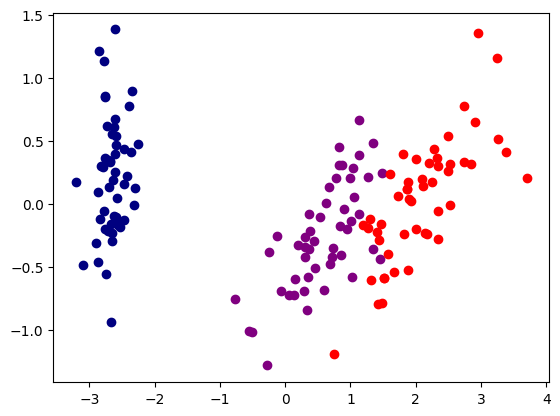

In [20]:
from sklearn.decomposition import SparsePCA
model = SparsePCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

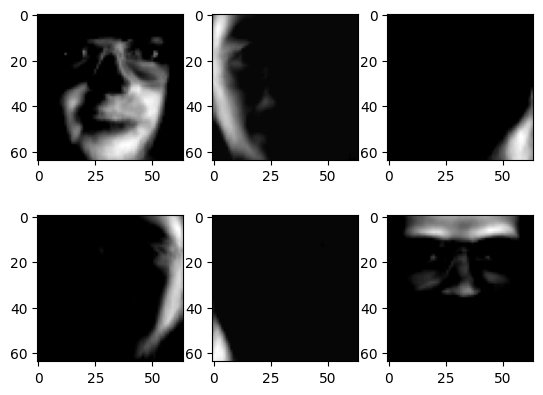

In [21]:
model = SparsePCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Truncated Singular Value Decomposition (Truncated SVD)

* PCA는 정방행렬에 대해서만 행렬 분해 가능
* SVD는 정방행렬 뿐만 아니라 행과 열이 다른 행렬도 분해 가능
* PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능 (싸이킷런 PCA에서는 내부적으로 SVD를 사용하고 있다)
* 전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적음
* 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용

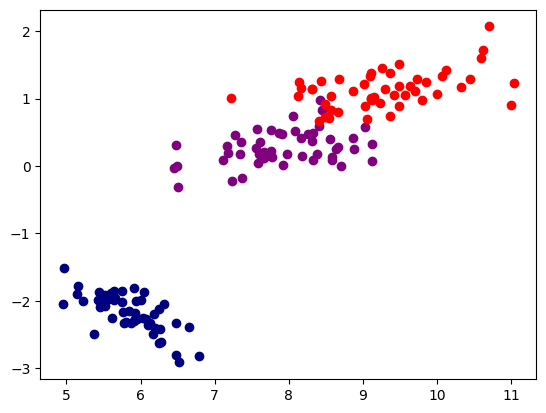

In [22]:
model = TruncatedSVD(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

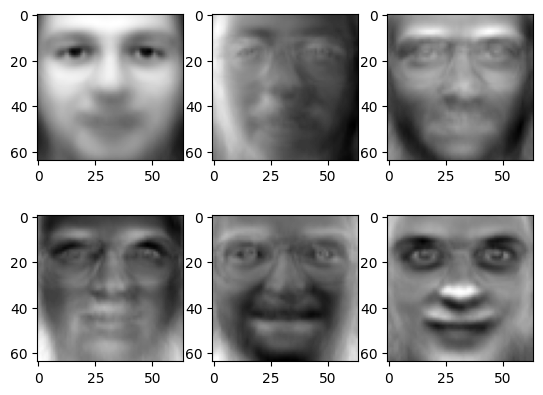

In [24]:
model =TruncatedSVD(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Dictionary Learning

* Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
* Sparse coding은 overcomplete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발
* 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남

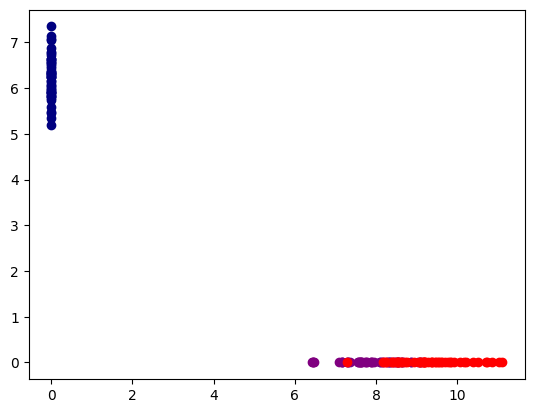

In [25]:
model = DictionaryLearning(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

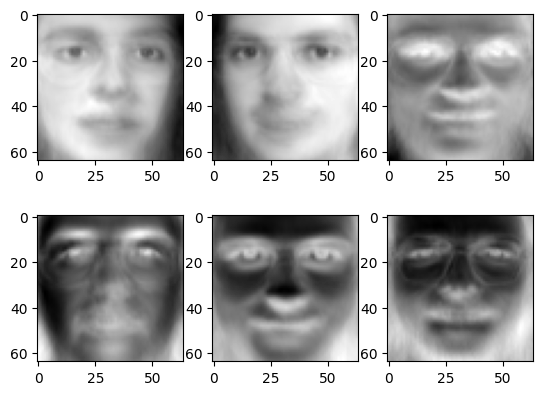

In [26]:
model = DictionaryLearning(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Factor Analysis

* 요인 분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법
* 요인 분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법
* PCA에서는 오차(error)를 고려하지 않고, 요인 분석에서는 오차(error)를 고려

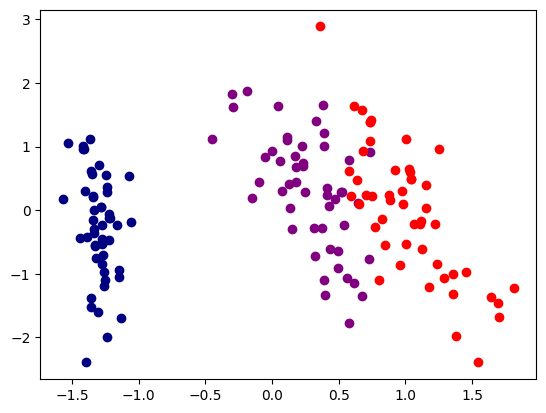

In [27]:
model = FactorAnalysis(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

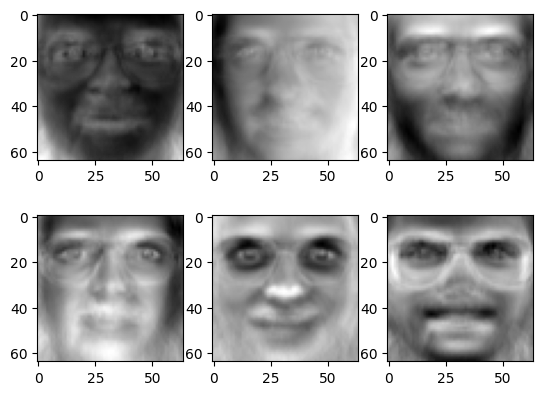

In [29]:
model = FactorAnalysis(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Independent Component Analysis(ICA)

* 독립 성분 분석(Independent Component Analysis, ICA)은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법
* ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 독립적인 축, 독립성이 최대가 되는 벡터를 찾음

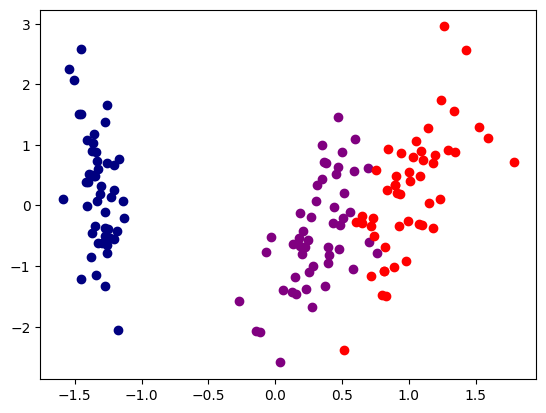

In [30]:
model = FastICA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


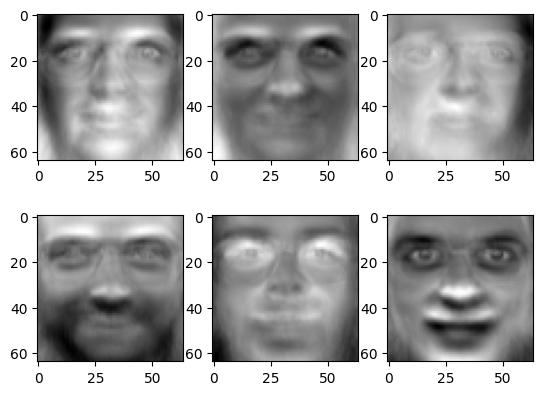

In [32]:
model = FastICA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Non-negative Matrix Factorization

* 음수 미포함 행렬 분해(Non-negative matrix factorization, NMF)는 음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


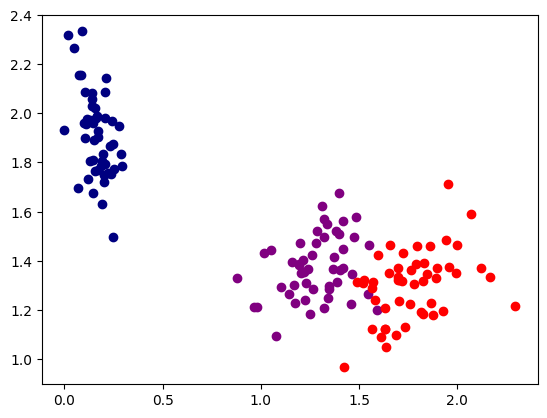

In [33]:
model = NMF(n_components=2, init='random', random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


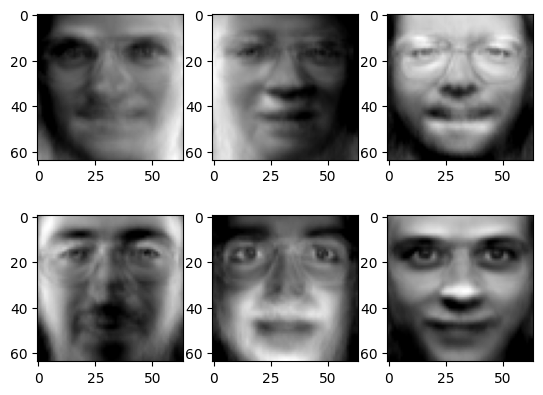

In [35]:
model = NMF(n_components=2*3,  random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Latent Dirichlet Allocation (LDA)

* 잠재 디리클레 할당은 이산 자료들에 대한 확률적 생성 모형
* 디리클레 분포에 따라 잠재적인 의미 구조를 파악


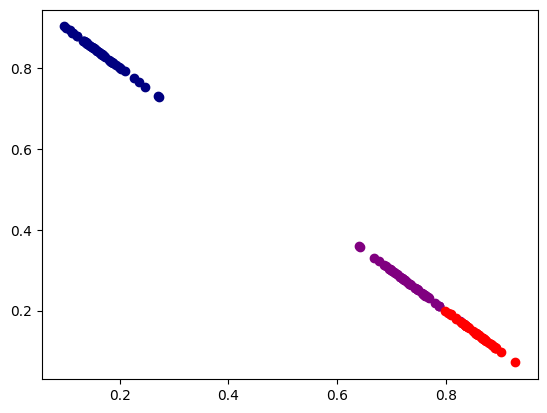

In [36]:
model = LatentDirichletAllocation(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

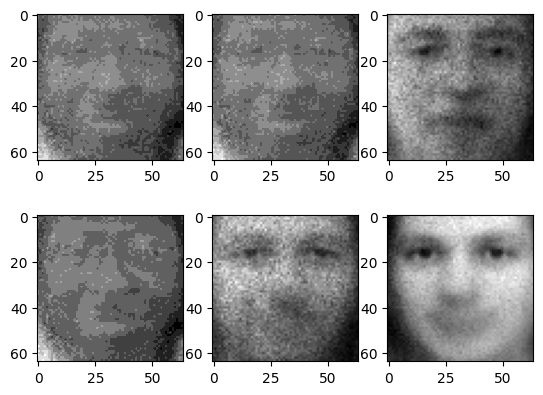

In [37]:
model = LatentDirichletAllocation(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Linear Discriminant Analysis (LDA)

* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
* LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소
* 개별 클래스를 분별할 수 있는 기준을 최대한 유지한다는 것은 클래스 값을 줘야한다는 의미이다. 따라서 지도학습에서만 사용 가능

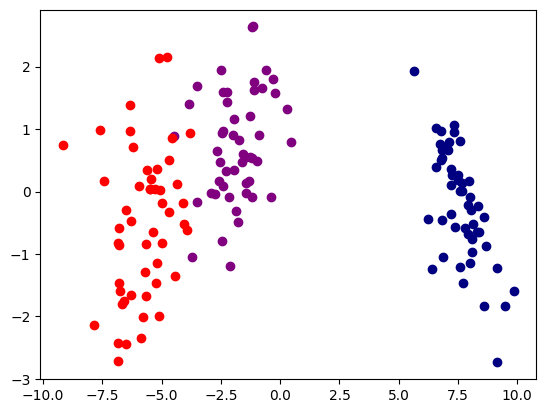

In [38]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris, labels)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

## 압축된 표현을 사용한 학습
* 행렬 분해를 통해 압축된 데이터를 사용해 학습

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [40]:
def min_max_scale(x):
  min_value, max_value = np.min(x, 0), np.max(x, 0)
  x = (x - min_value) / (max_value - min_value)
  return x

In [50]:
def plot_digits(digits, labels):
  digits =min_max_scale(digits)
  ax = plt.subplot(111, projection='3d')
  for i in range(digits.shape[0]):
    ax.text(digits[i, 0], digits[i, 1], digits[i, 2],
            str(labels[i]), color=plt.cm.Set1(labels[i] / 10.),
            fontdict={'weight': 'bold', 'size': 9})

In [45]:
digits = load_digits()

In [46]:
nmf = NMF(n_components=3)
nmf.fit(digits.data)
decomposed_digits = nmf.transform(digits.data)

In [48]:
print(digits.data.shape)
print(decomposed_digits.shape)
print(decomposed_digits)

(1797, 64)
(1797, 3)
[[0.24499883 0.47817683 0.        ]
 [0.14365092 0.02509325 1.21364555]
 [0.19329148 0.14451199 0.90614854]
 ...
 [0.29648561 0.17544431 0.87928127]
 [0.22025861 0.61991334 0.15071765]
 [0.27961489 0.48855873 0.38918939]]


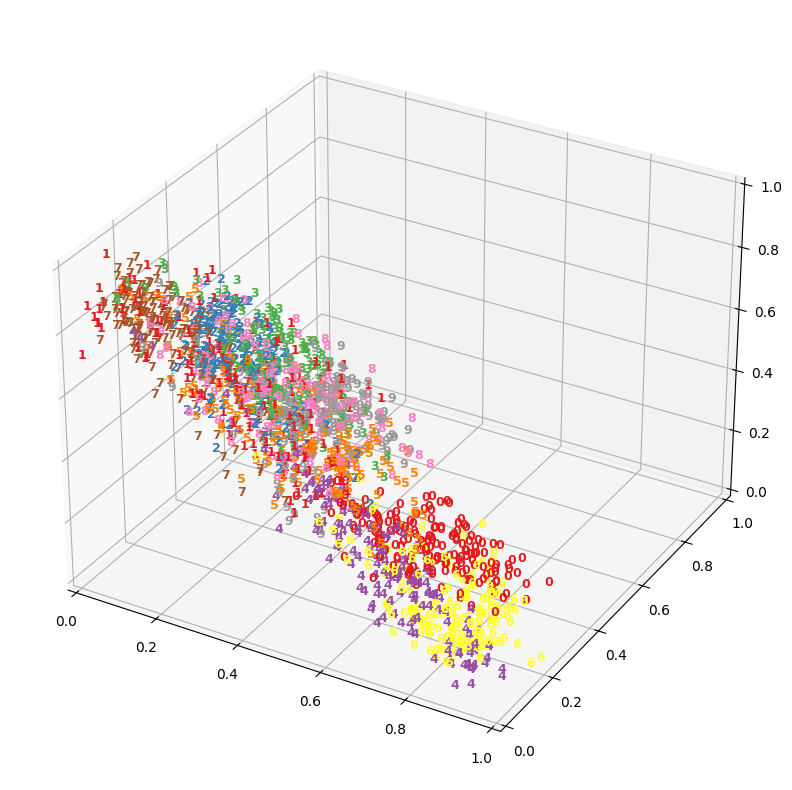

In [51]:
plt.figure(figsize=(20,10))
plot_digits(decomposed_digits, digits.target)

### KNN

In [52]:
knn = KNeighborsClassifier()

In [54]:
score = cross_val_score(
    estimator = knn,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [55]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9627282575054161 (+/- 0.011168537355954218)


In [56]:
score = cross_val_score(
    estimator = knn,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.60833333, 0.61666667, 0.65181058, 0.62674095, 0.63509749])

In [57]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6277298050139276 (+/- 0.01505829189044171)


### SVM

In [58]:
svm=SVC()

In [60]:
score = cross_val_score(
    estimator = svm,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [61]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9632838130609718 (+/- 0.02008605863225686)


In [62]:
score = cross_val_score(
    estimator = svm,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.60555556, 0.675     , 0.66295265, 0.64066852, 0.6183844 ])

In [63]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6405122253172392 (+/- 0.02609449324169577)


### Decision Tree

In [64]:
decision_tree = DecisionTreeClassifier()

In [65]:
score = cross_val_score(
    estimator = decision_tree,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.79166667, 0.70833333, 0.7994429 , 0.83008357, 0.78551532])

In [66]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.783008356545961 (+/- 0.040357848568728164)


In [67]:
score = cross_val_score(
    estimator = svm,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.60555556, 0.675     , 0.66295265, 0.64066852, 0.6183844 ])

In [68]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6405122253172392 (+/- 0.02609449324169577)


### Random Forest

In [69]:
random_forest = RandomForestClassifier()

In [70]:
score = cross_val_score(
    estimator = random_forest,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.94166667, 0.90833333, 0.9637883 , 0.97493036, 0.93593315])

In [71]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9449303621169916 (+/- 0.023180017018909056)


In [72]:
score = cross_val_score(
    estimator = random_forest,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.64722222, 0.65      , 0.66016713, 0.6545961 , 0.63509749])

In [73]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6494165892912411 (+/- 0.008397542638320637)


## 복원된 표현을 사용한 학습
* 분해 후 복원된 행렬을 사용해 학습

In [75]:
components = nmf.components_
reconstructed_digits = decomposed_digits @ components # @ 행렬곱
reconstructed_digits.shape

(1797, 64)

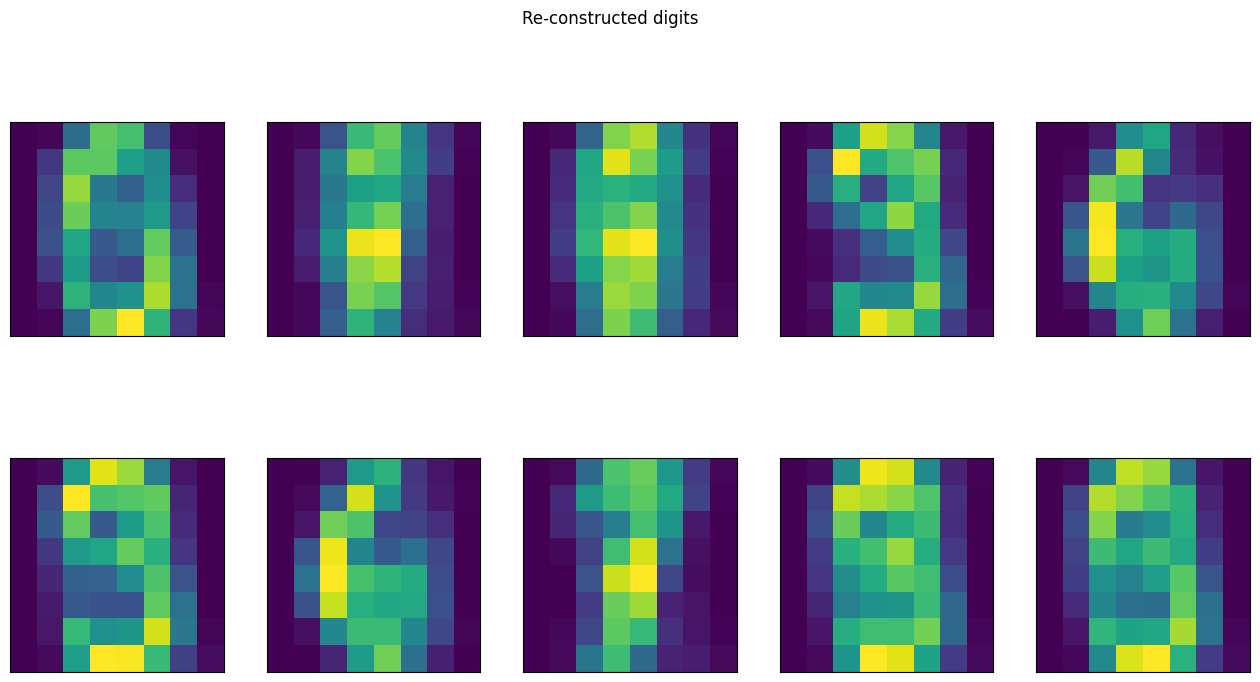

In [78]:
plt.figure(figsize=(16,8))
plt.suptitle('Re-constructed digits')
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(reconstructed_digits[i].reshape(8, 8))

### KNN

In [79]:
score = cross_val_score(
    estimator = knn,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.60833333, 0.61666667, 0.65181058, 0.62674095, 0.63509749])

In [80]:
print('mean cross val score: {}(+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6277298050139276(+/- 0.01505829189044171)


### SVM

In [81]:
score = cross_val_score(
    estimator = svm,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.60555556, 0.675     , 0.66295265, 0.64066852, 0.6183844 ])

In [82]:
print('mean cross val score: {}(+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6405122253172392(+/- 0.02609449324169577)


### Decision Tree

In [83]:
score = cross_val_score(
    estimator = decision_tree,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.53611111, 0.52777778, 0.59610028, 0.59331476, 0.58495822])

In [84]:
print('mean cross val score: {}(+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.5676524295883627(+/- 0.02950311303647443)


### Random Forest

In [85]:
score = cross_val_score(
    estimator = random_forest,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.63055556, 0.63611111, 0.66573816, 0.6545961 , 0.64345404])

In [86]:
print('mean cross val score: {}(+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6460909935004643(+/- 0.012698420907810325)


## 이미지 복원

행렬을 factorization을 하는 이유는 아래의 실습을 통해 응용가능하다.

In [90]:
from sklearn.model_selection import train_test_split
train_faces, test_faces = train_test_split(faces, test_size=0.1)

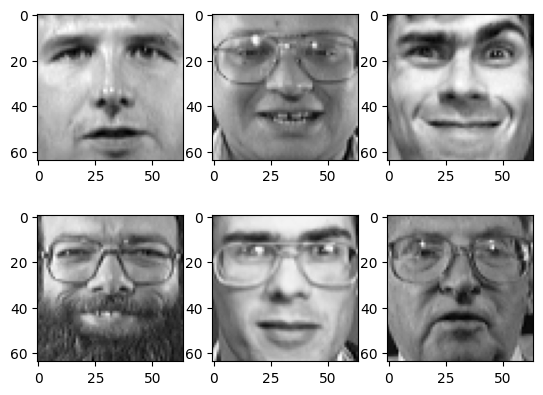

In [91]:
show_faces(train_faces)

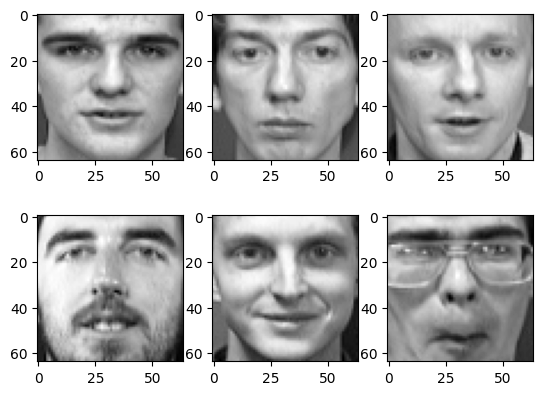

In [92]:
show_faces(test_faces)

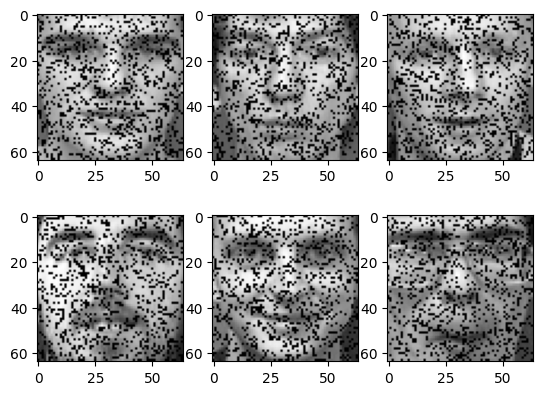

In [95]:
# 손상된 얼굴 데이터 생성
damaged_faces = []
for face in test_faces:
  idx = np.random.choice(range(64*64), size=1024)
  damaged_face = face.copy()
  damaged_face[idx] = 0.
  damaged_faces.append(damaged_face)
show_faces(damaged_faces)

In [104]:
# 손상된 얼굴 데이터 타입 변환
damaged_faces = np.array(damaged_faces).astype(np.float64)

In [108]:
# NMF 모델 학습
nmf = NMF(n_components=10)
nmf.fit(train_faces.astype(np.float64))


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=10)

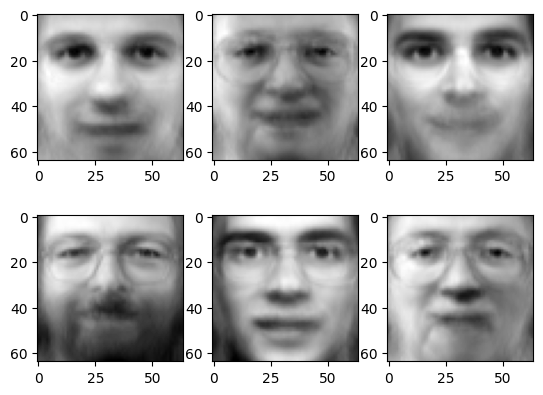

In [109]:
matrix1 = nmf.transform(train_faces.astype(np.float64))
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

In [110]:
# NMF 모델 재학습
nmf = NMF(n_components=100)
nmf.fit(train_faces.astype(np.float64))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=100)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


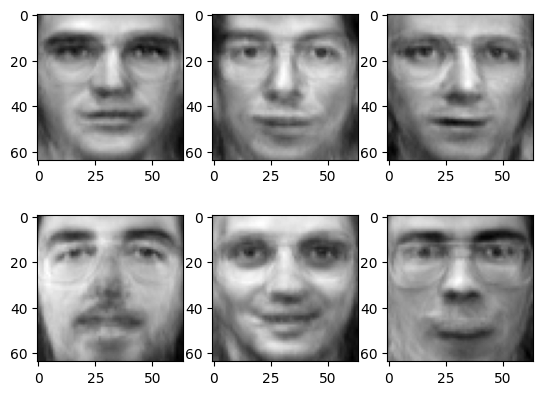

In [111]:
matrix1 = nmf.transform(damaged_faces.astype(np.float64))
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

In [112]:
# NMF 모델 300으로 다시 학습
nmf = NMF(n_components=300)
nmf.fit(train_faces.astype(np.float64))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=300)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


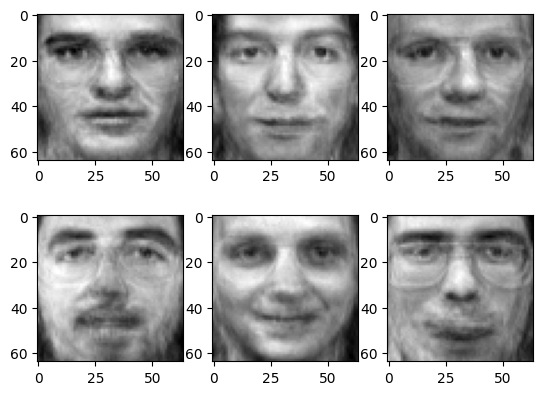

In [113]:
matrix1 = nmf.transform(damaged_faces.astype(np.float64))
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)